# Project Data Science

### Przewidywanie wzięcia pożyczki.




### Input variables:

- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels


### Outcomes:

- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime


import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import numpy as np


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


In [2]:
data = pd.read_csv('Train.csv',  encoding='iso-8859-1')

In [3]:
data.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'],
      dtype='object')

In [4]:
data.drop("LoggedIn", axis=1, inplace=True)

In [5]:
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 25 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [9]:
null_number = data.isnull().sum()
print("Null values in column:\n{}".format(null_number))

Null values in column:
ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                    0
dtype: int64


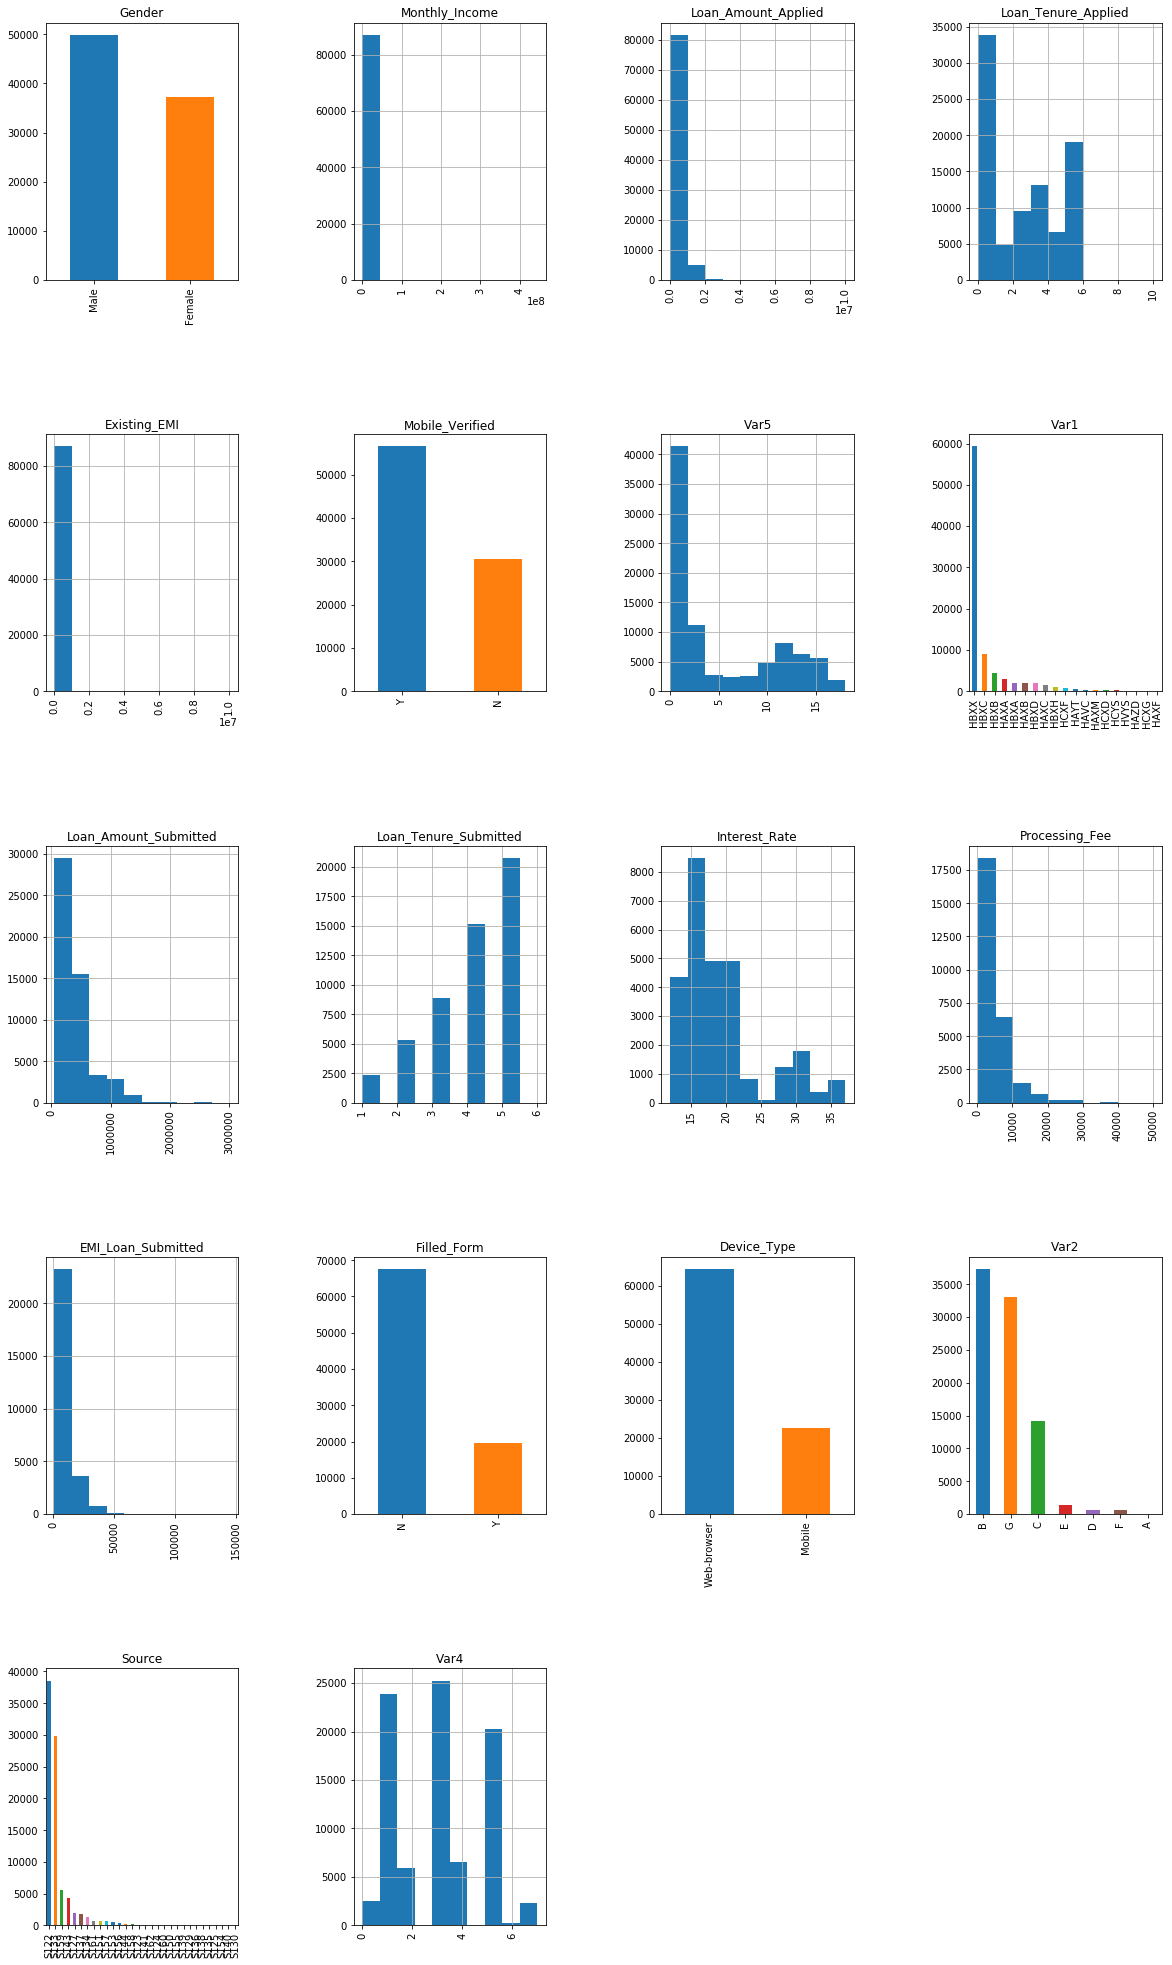

In [10]:
plt_list = data[['Gender', 'Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
                 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4',]]

fig=plt.figure(figsize=(20,35))
col=4
rows=math.ceil(float(plt_list.shape[1])/col)
for i, column in enumerate(plt_list.columns):
    ax=fig.add_subplot(rows,col, i+1)
    ax.set_title(column)
    if plt_list.dtypes[column]==np.object:
        plt_list[column].value_counts().plot(kind="bar", axes=ax)
    else:
        plt_list[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.6,wspace=0.6)

In [69]:
Value_cols = data[['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 
                   'Loan_Amount_Submitted', 'Loan_Tenure_Submitted']]
Value_cols.describe().round(2)

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Loan_Amount_Submitted,Loan_Tenure_Submitted
count,8.702000e+04,86949.00,86949.00,52407.00,52407.00
mean,5.884997e+04,230250.70,2.13,395010.59,3.89
std,2.177511e+06,354206.76,2.01,308248.14,1.17
min,0.000000e+00,0.00,0.00,50000.00,1.00
25%,1.650000e+04,0.00,0.00,200000.00,3.00
50%,2.500000e+04,100000.00,2.00,300000.00,4.00
75%,4.000000e+04,300000.00,4.00,500000.00,5.00
max,4.445544e+08,10000000.00,10.00,3000000.00,6.00


### Czyszczenie danych, uzupenianie null'i i transformacja do postaci numerycznej zmiennych tekstowych

#### Zmienna DOB, Lead_Creation_Date i utworzenie zmiennej Age (w latach)

In [12]:
# uzupenienie DOB o '19' zapewnia dane z przeszlosci 
data2 = data.copy()
data2['DOB_2'] = ['-'.join([row.split('-')[0],row.split('-')[1],'19' + row.split('-')[2]]) for row in data2['DOB']]
data2.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,DOB_2
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,23-May-1978
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,07-Oct-1985
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,10-Oct-1981
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,30-Nov-1987
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,0,17-Feb-1984


In [13]:
data2['DOB_3']=pd.to_datetime(data2['DOB_2'])
data2['LCD_2']=pd.to_datetime(data2['Lead_Creation_Date'])
data2.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,DOB_2,DOB_3,LCD_2
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,N,Web-browser,G,S122,1,0,23-May-1978,1978-05-23,2015-05-15
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,6762.9,N,Web-browser,G,S122,3,0,07-Oct-1985,1985-10-07,2015-05-04
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,N,Web-browser,B,S143,1,0,10-Oct-1981,1981-10-10,2015-05-19
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,N,Web-browser,B,S143,3,0,30-Nov-1987,1987-11-30,2015-05-09
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,N,Web-browser,B,S134,3,0,17-Feb-1984,1984-02-17,2015-05-20


In [14]:
len(data2.loc[(data2['DOB_3'] >= '2000-01-01')])

0

In [15]:
data2['Age'] = (data2['LCD_2'] - data2['DOB_3']).astype('timedelta64[Y]')
data2.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,DOB_2,DOB_3,LCD_2,Age
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,N,Web-browser,G,S122,1,0,23-May-1978,1978-05-23,2015-05-15,36.0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,N,Web-browser,G,S122,3,0,07-Oct-1985,1985-10-07,2015-05-04,29.0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,N,Web-browser,B,S143,1,0,10-Oct-1981,1981-10-10,2015-05-19,33.0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,N,Web-browser,B,S143,3,0,30-Nov-1987,1987-11-30,2015-05-09,27.0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,N,Web-browser,B,S134,3,0,17-Feb-1984,1984-02-17,2015-05-20,31.0


Sprawdzenie dat po transformacji

In [16]:
dates = ['DOB_3', 'LCD_2', 'Age']

for col in dates:
    print("\nMAX {}".format(col)+ ":   {}".format(data2[col].max()))
    print("MIN {}".format(col)+ ":   {}".format(data2[col].min()))



MAX DOB_3:   1997-12-25 00:00:00
MIN DOB_3:   1915-06-20 00:00:00

MAX LCD_2:   2015-07-31 00:00:00
MIN LCD_2:   2015-05-01 00:00:00

MAX Age:   100.0
MIN Age:   17.0


#### Zmienna Gender

In [17]:
data2['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

In [18]:
data2['Gender'] = data2['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [19]:
data2['Gender'].value_counts()

1    49848
0    37172
Name: Gender, dtype: int64

#### Zmienna Device_type

In [20]:
data2['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [21]:
data2['Device_Type'] = data2['Device_Type'].map( {'Web-browser': 0, 'Mobile': 1} ).astype(int)

In [22]:
data2['Device_Type'].value_counts()

0    64316
1    22704
Name: Device_Type, dtype: int64

#### Zmienna Mobile_Verified

In [23]:
data2['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [24]:
data2['Mobile_Verified'] = data2['Mobile_Verified'].map( {'N': 0, 'Y': 1} ).astype(int)
data2['Mobile_Verified'].value_counts()

1    56481
0    30539
Name: Mobile_Verified, dtype: int64

#### Zmienna Filled_form

In [25]:
data2['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [26]:
data2['Filled_Form'] = data2['Filled_Form'].map( {'N': 0, 'Y': 1} ).astype(int)
data2['Filled_Form'].value_counts()

0    67530
1    19490
Name: Filled_Form, dtype: int64

#### Zmienna Employer_name


In [27]:
data2['Employer_Name'].value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
HCL TECHNOLOGIES LTD                             250
ICICI BANK LTD                                   239
INDIAN AIR FORCE                                 191
INFOSYS TECHNOLOGIES                             181
GENPACT                                          179
IBM CORPORATION                                  173
INDIAN ARMY                                      171
TYPE SLOWLY FOR AUTO FILL                        162
WIPRO TECHNOLOGIES                               155
HDFC BANK LTD                                    148
IKYA HUMAN CAPITAL SOLUTIONS LTD                 142
STATE GOVERNMENT                                 134
INDIAN RAILWAY                                   130
INDIAN NAVY                                   

In [28]:
data2['Employer_Name'].fillna('0',inplace=True)

In [29]:
data2['Employer_Name'].str.contains('TATA').value_counts()

False    85862
True      1158
Name: Employer_Name, dtype: int64

In [30]:
data2['Employer_Name'].str.match('TATA').value_counts()

False    85964
True      1056
Name: Employer_Name, dtype: int64

In [31]:
# sprawdzenie dla GOOGLE, IBM , CAPGEMINI, INFOSYS
data2['Employer_Name'].str.contains('INFOSYS').value_counts()

False    86648
True       372
Name: Employer_Name, dtype: int64

In [32]:
data2.loc[data2['Employer_Name'].str.contains('TATA'), 'Employer_Name'] = 'TATA CONSULTANCY SERVICES LTD (TCS)'
data2.loc[data2['Employer_Name'].str.contains('GOOGLE'), 'Employer_Name'] = 'GOOGLE'
data2.loc[data2['Employer_Name'].str.contains('IBM'), 'Employer_Name'] = 'IBM'
data2.loc[data2['Employer_Name'].str.contains('CAPGEMINI'), 'Employer_Name'] = 'CAPGEMINI'
data2.loc[data2['Employer_Name'].str.contains('INFOSYS'), 'Employer_Name'] = 'INFOSYS'


In [33]:
data2.Employer_Name.value_counts()/data2.shape[0]

0                                               0.057286
TATA CONSULTANCY SERVICES LTD (TCS)             0.013307
IBM                                             0.005562
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD    0.004643
INFOSYS                                         0.004275
ACCENTURE SERVICES PVT LTD                      0.003723
GOOGLE                                          0.003528
HCL TECHNOLOGIES LTD                            0.002873
ICICI BANK LTD                                  0.002746
INDIAN AIR FORCE                                0.002195
GENPACT                                         0.002057
CAPGEMINI                                       0.001965
INDIAN ARMY                                     0.001965
TYPE SLOWLY FOR AUTO FILL                       0.001862
WIPRO TECHNOLOGIES                              0.001781
HDFC BANK LTD                                   0.001701
IKYA HUMAN CAPITAL SOLUTIONS LTD                0.001632
STATE GOVERNMENT               

In [34]:
empl_list = data2.Employer_Name.value_counts()/data2.shape[0]
empl_list2 = list(empl_list[:26].index)
print(empl_list2)

['0', 'TATA CONSULTANCY SERVICES LTD (TCS)', 'IBM', 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD', 'INFOSYS', 'ACCENTURE SERVICES PVT LTD', 'GOOGLE', 'HCL TECHNOLOGIES LTD', 'ICICI BANK LTD', 'INDIAN AIR FORCE', 'GENPACT', 'CAPGEMINI', 'INDIAN ARMY', 'TYPE SLOWLY FOR AUTO FILL', 'WIPRO TECHNOLOGIES', 'HDFC BANK LTD', 'IKYA HUMAN CAPITAL SOLUTIONS LTD', 'STATE GOVERNMENT', 'INDIAN RAILWAY', 'INDIAN NAVY', 'ARMY', 'WIPRO BPO', 'OTHERS', 'TECH MAHINDRA LTD', 'CONVERGYS INDIA SERVICES PVT LTD', 'SERCO BPO PVT LTD']


In [35]:
data2.loc[ ~data2['Employer_Name'].isin(empl_list2), 'Employer_Name'] = 'OTHER'

In [36]:
data2.loc[data2['Employer_Name'].isin(['0', 'OTHER', 'OTHERS', 'TYPE SLOWLY FOR AUTO FILL ']), 'Employer_Name'] = 'OTHER'

In [37]:
data2['Employer_Name'].value_counts()

OTHER                                           81195
TATA CONSULTANCY SERVICES LTD (TCS)              1158
IBM                                               484
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD      404
INFOSYS                                           372
ACCENTURE SERVICES PVT LTD                        324
GOOGLE                                            307
HCL TECHNOLOGIES LTD                              250
ICICI BANK LTD                                    239
INDIAN AIR FORCE                                  191
GENPACT                                           179
INDIAN ARMY                                       171
CAPGEMINI                                         171
TYPE SLOWLY FOR AUTO FILL                         162
WIPRO TECHNOLOGIES                                155
HDFC BANK LTD                                     148
IKYA HUMAN CAPITAL SOLUTIONS LTD                  142
STATE GOVERNMENT                                  134
INDIAN RAILWAY              

#### Zmienna City

In [38]:
data2['City'].fillna('OTHER',inplace=True)

In [39]:
city_list = data2.City.value_counts()/data2.shape[0]
city_list2 = list(city_list[:13].index)

In [40]:
print(city_list2)

['Delhi', 'Bengaluru', 'Mumbai', 'Hyderabad', 'Chennai', 'Pune', 'Kolkata', 'Ahmedabad', 'Jaipur', 'Gurgaon', 'Coimbatore', 'OTHER', 'Thane']


In [41]:
data2.loc[ ~data2['City'].isin(city_list2), 'City'] = 'OTHER'

In [42]:
data2['City'].value_counts()

OTHER         24208
Delhi         12527
Bengaluru     10824
Mumbai        10795
Hyderabad      7272
Chennai        6916
Pune           5207
Kolkata        2888
Ahmedabad      1788
Jaipur         1331
Gurgaon        1212
Coimbatore     1147
Thane           905
Name: City, dtype: int64

In [43]:
null_number = data2.isnull().sum()
print("Null values in column:\n{}".format(null_number))

Null values in column:
ID                           0
Gender                       0
City                         0
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name                0
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                    0
DOB_2                        0
DOB_3                        0
LCD_2                        0
Age                          0
dtype: int64


In [44]:
data2['Salary_Account'].fillna('OTHER',inplace=True)

In [45]:
data2['Salary_Account'].value_counts()/data2.shape[0]

HDFC Bank                                          0.203344
ICICI Bank                                         0.156700
State Bank of India                                0.136095
OTHER                                              0.135187
Axis Bank                                          0.100931
Citibank                                           0.027304
Kotak Bank                                         0.023753
IDBI Bank                                          0.017812
Punjab National Bank                               0.013801
Bank of India                                      0.013445
Bank of Baroda                                     0.012940
Standard Chartered Bank                            0.011434
Canara Bank                                        0.011377
Union Bank of India                                0.010929
Yes Bank                                           0.008952
ING Vysya                                          0.007791
Corporation bank                        

In [46]:
sa_list = data2['Salary_Account'].value_counts()/data2.shape[0]
sa_list2 = list(sa_list[:14].index)
sa_list2

['HDFC Bank',
 'ICICI Bank',
 'State Bank of India',
 'OTHER',
 'Axis Bank',
 'Citibank',
 'Kotak Bank',
 'IDBI Bank',
 'Punjab National Bank',
 'Bank of India',
 'Bank of Baroda',
 'Standard Chartered Bank',
 'Canara Bank',
 'Union Bank of India']

In [47]:
data2.loc[ ~data2['Salary_Account'].isin(sa_list2), 'Salary_Account'] = 'OTHER'

In [48]:
data2['Salary_Account'].value_counts()/data2.shape[0]

OTHER                      0.260136
HDFC Bank                  0.203344
ICICI Bank                 0.156700
State Bank of India        0.136095
Axis Bank                  0.100931
Citibank                   0.027304
Kotak Bank                 0.023753
IDBI Bank                  0.017812
Punjab National Bank       0.013801
Bank of India              0.013445
Bank of Baroda             0.012940
Standard Chartered Bank    0.011434
Canara Bank                0.011377
Union Bank of India        0.010929
Name: Salary_Account, dtype: float64

#### Zmienna VAR1

In [49]:
VAR1_list = data2['Var1'].value_counts()/data2.shape[0]
VAR1_list

HBXX    0.681384
HBXC    0.103539
HBXB    0.051471
HAXA    0.033429
HBXA    0.024397
HAXB    0.023110
HBXD    0.022570
HAXC    0.017651
HBXH    0.011147
HCXF    0.008297
HAYT    0.005838
HAVC    0.004413
HAXM    0.003080
HCXD    0.002724
HCYS    0.002494
HVYS    0.002137
HAZD    0.001253
HCXG    0.000896
HAXF    0.000172
Name: Var1, dtype: float64

In [50]:
VAR1_list2 = list(VAR1_list[:8].index)

In [51]:
data2.loc[ ~data2['Var1'].isin(VAR1_list2), 'Var1'] = 'OTHER'

In [52]:
data2['Var1'].value_counts()

HBXX     59294
HBXC      9010
HBXB      4479
OTHER     3694
HAXA      2909
HBXA      2123
HAXB      2011
HBXD      1964
HAXC      1536
Name: Var1, dtype: int64

#### Zmienna VAR2

In [53]:
VAR2_list = data2['Var2'].value_counts()/data2.shape[0]
VAR2_list

B    0.428407
G    0.379591
C    0.163296
E    0.015111
D    0.007286
F    0.006251
A    0.000057
Name: Var2, dtype: float64

In [54]:
VAR2_list2 = list(VAR2_list[:3].index)
VAR2_list2

['B', 'G', 'C']

In [55]:
data2.loc[ ~data2['Var2'].isin(VAR2_list2), 'Var2'] = 'OTHER'

In [56]:
data2['Var2'].value_counts()

B        37280
G        33032
C        14210
OTHER     2498
Name: Var2, dtype: int64

#### Zmienna Source

In [57]:
data2['Source'].value_counts()/data2.shape[0]

S122    0.443197
S133    0.343427
S159    0.064342
S143    0.049782
S127    0.022190
S137    0.019812
S134    0.014951
S161    0.008837
S151    0.008274
S157    0.007470
S153    0.005677
S156    0.003539
S144    0.003436
S158    0.002390
S123    0.000839
S141    0.000655
S162    0.000414
S124    0.000276
S160    0.000126
S150    0.000115
S155    0.000046
S139    0.000034
S129    0.000034
S136    0.000034
S138    0.000034
S135    0.000023
S125    0.000011
S154    0.000011
S140    0.000011
S130    0.000011
Name: Source, dtype: float64

In [58]:
Source_list = data2['Source'].value_counts()/data2.shape[0]
Source_list2 = list(Source_list[:6].index)
Source_list2

['S122', 'S133', 'S159', 'S143', 'S127', 'S137']

In [59]:
data2.loc[ ~data2['Source'].isin(Source_list2), 'Source'] = 'OTHER'

In [60]:
data2['Source'].value_counts()

S122     38567
S133     29885
S159      5599
OTHER     4982
S143      4332
S127      1931
S137      1724
Name: Source, dtype: int64

In [61]:
data2.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'Disbursed', 'DOB_2', 'DOB_3', 'LCD_2',
       'Age'],
      dtype='object')

#### Dla zmiennych numerycznych wartosci null wypelniamy:
- srednia - dla wartosci w polach 'wnioskowanych'
- zerami - dla wartosci w polach 'przyznane' ( dla pol w ktorych wartosci null oznaczaja 'nie dotyczy' czyli pozyczka nie przyznana)

In [62]:
list_null_to_mean = ['Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI']

for column in list_null_to_mean:
    data2[column] = data2[column].fillna(data2[column].mean())

In [63]:
list_null_to_zero = ['Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'EMI_Loan_Submitted', 'Interest_Rate', 'Processing_Fee']

for column in list_null_to_zero:
    data2[column] = data2[column].fillna(0)

In [64]:
null_counts = data2.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
ID                       0
Gender                   0
City                     0
Monthly_Income           0
DOB                      0
Lead_Creation_Date       0
Loan_Amount_Applied      0
Loan_Tenure_Applied      0
Existing_EMI             0
Employer_Name            0
Salary_Account           0
Mobile_Verified          0
Var5                     0
Var1                     0
Loan_Amount_Submitted    0
Loan_Tenure_Submitted    0
Interest_Rate            0
Processing_Fee           0
EMI_Loan_Submitted       0
Filled_Form              0
Device_Type              0
Var2                     0
Source                   0
Var4                     0
Disbursed                0
DOB_2                    0
DOB_3                    0
LCD_2                    0
Age                      0
dtype: int64


In [65]:
data2=data2.drop(['ID', 'DOB', 'Lead_Creation_Date','DOB_2', 'DOB_3', 'LCD_2'],axis=1)

wizualizacja danych po transformacji

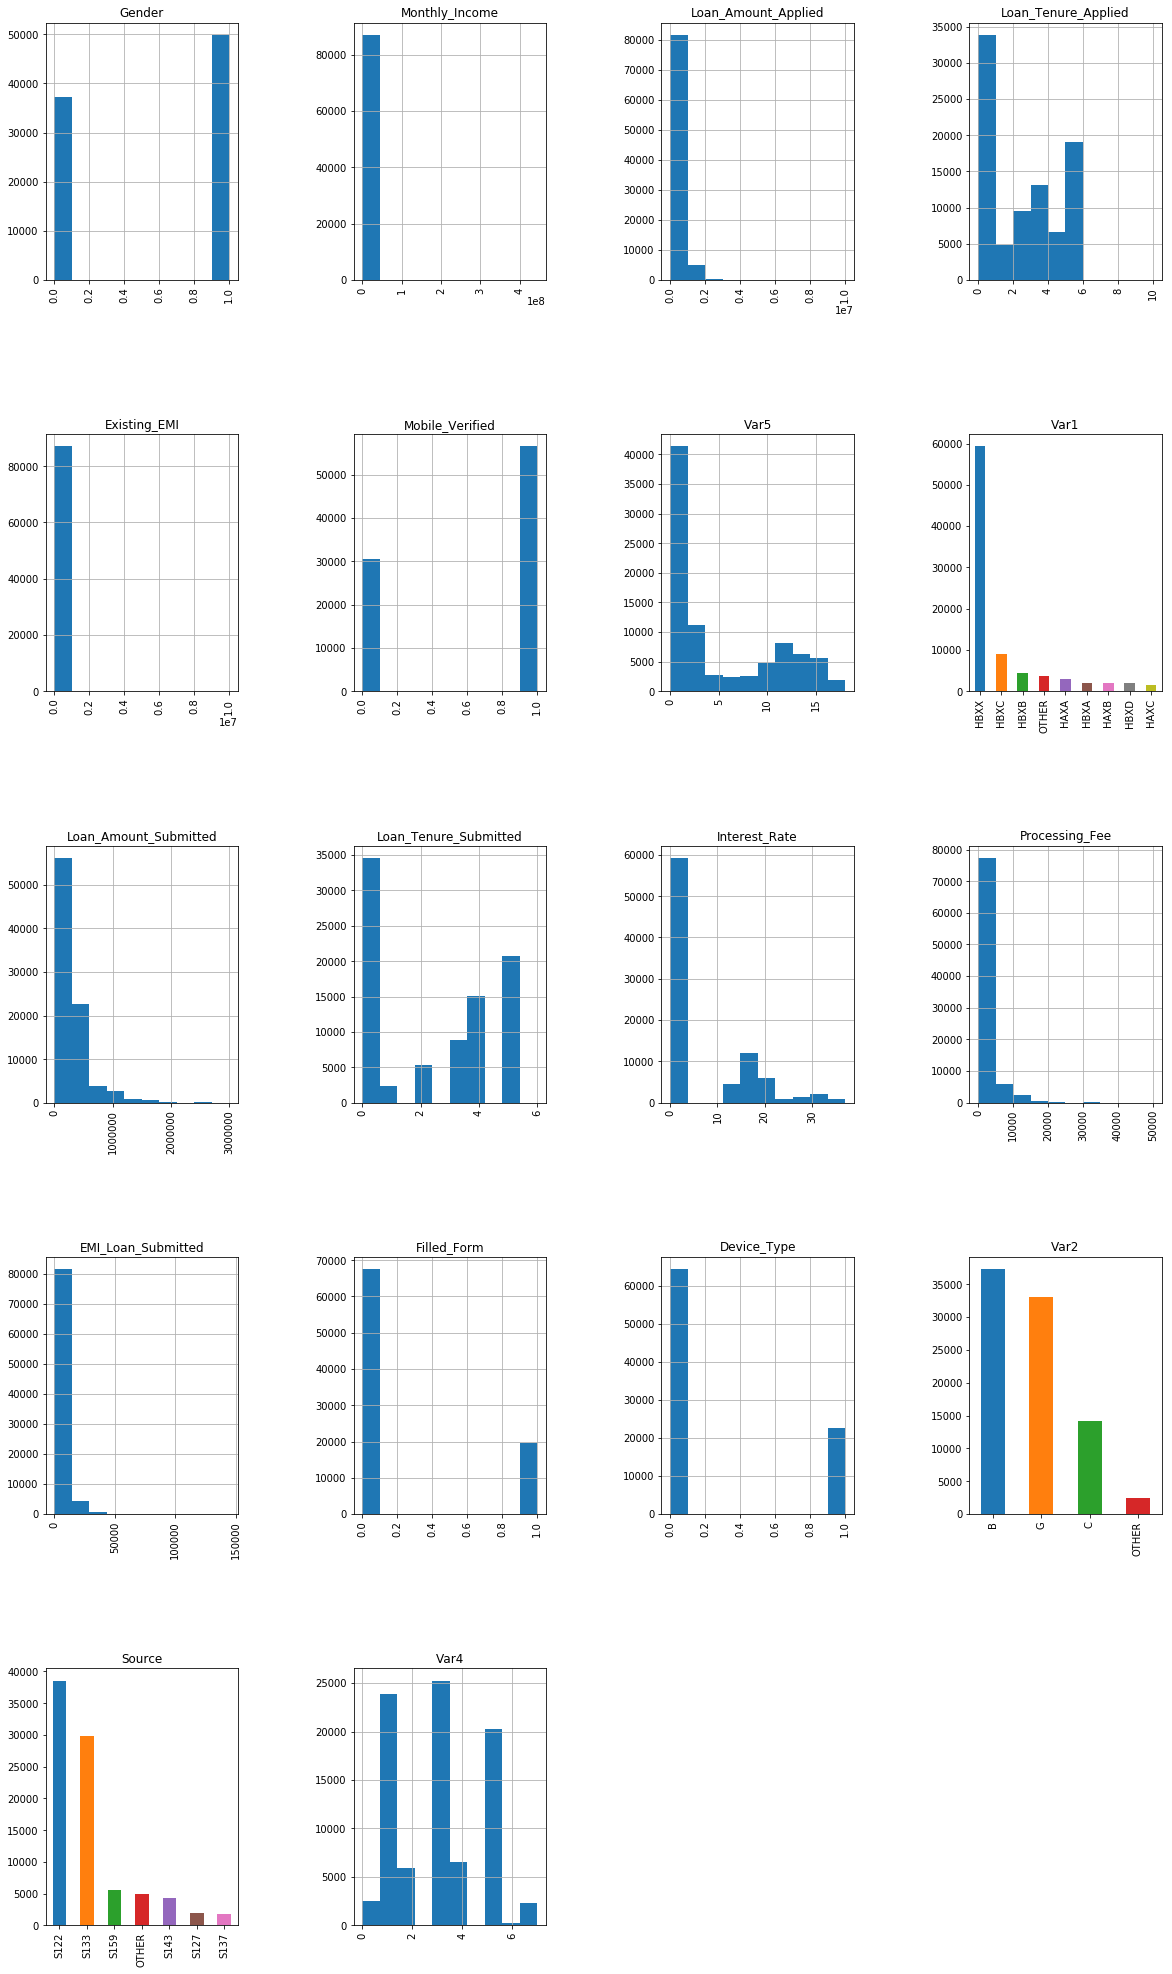

In [71]:
plt_list = data2[['Gender', 'Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
                 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4',]]

fig=plt.figure(figsize=(20,35))
col=4
rows=math.ceil(float(plt_list.shape[1])/col)
for i, column in enumerate(plt_list.columns):
    ax=fig.add_subplot(rows,col, i+1)
    ax.set_title(column)
    if plt_list.dtypes[column]==np.object:
        plt_list[column].value_counts().plot(kind="bar", axes=ax)
    else:
        plt_list[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.6,wspace=0.6)

### Modelowanie

W modelach zostanie wyznaczony roc_auc jako miara oceny jakości modelu - dla niezbalanowanej probki accuracy score moze dzialac zle.

Zostanie rowniez wykorzystana metoda under- i oversamplingu.

In [72]:
df_model = pd.get_dummies(data2, drop_first=True)

In [73]:
df_model.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var4', 'Disbursed', 'Age', 'City_Bengaluru', 'City_Chennai',
       'City_Coimbatore', 'City_Delhi', 'City_Gurgaon', 'City_Hyderabad',
       'City_Jaipur', 'City_Kolkata', 'City_Mumbai', 'City_OTHER', 'City_Pune',
       'City_Thane', 'Employer_Name_ARMY', 'Employer_Name_CAPGEMINI',
       'Employer_Name_COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
       'Employer_Name_CONVERGYS INDIA SERVICES PVT LTD',
       'Employer_Name_GENPACT', 'Employer_Name_GOOGLE',
       'Employer_Name_HCL TECHNOLOGIES LTD', 'Employer_Name_HDFC BANK LTD',
       'Employer_Name_IBM', 'Employer_Name_ICICI BANK LTD',
       'Employer_Name_IKYA HUMAN CAPITAL SOLUTIONS LTD',
       'Employer_Name_INDIAN AIR FORCE', 'Employer

In [74]:
df_model.shape

(87020, 83)

In [75]:
X = df_model.drop(['Disbursed'], axis=1)
y = df_model['Disbursed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dane niezbalansowane:

In [76]:
df_model.Disbursed.value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

In [77]:
pipe = Pipeline([("scaler",StandardScaler()),("model",LogisticRegression( penalty = 'l1', random_state = 42))])
pipe.fit(X_train, y_train)
print('Accuracy_test:', accuracy_score(y_test,pipe.predict(X_test)))
print('ROC_AUC_test:', roc_auc_score(y_test,pipe.predict(X_test)))
print('F1_score_test', f1_score(y_test,pipe.predict(X_test)))

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataC

Accuracy_test: 0.984869378686892
ROC_AUC_test: 0.49998055382700685
F1_score_test 0.0


In [78]:
disbursed_pred = pipe.predict(X_test)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [79]:
np.unique(disbursed_pred, return_counts=True)

(array([0, 1]), array([26105,     1]))

Przygotowanie do under- i oversamplingu

Class_0:  60035 , Class_1:  879


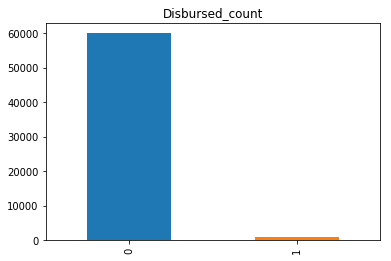

In [80]:
df_train = pd.concat([X_train, y_train], axis=1)

count_class_0, count_class_1 = df_train['Disbursed'].value_counts()
print('Class_0: ', count_class_0, ', Class_1: ', count_class_1)
df_model_class_0=df_train[df_train['Disbursed']==0]
df_model_class_1=df_train[df_train['Disbursed']==1]
df_train['Disbursed'].value_counts().plot(kind='bar', title='Disbursed_count')


Metoda udnersamplingu

1    879
0    879
Name: Disbursed, dtype: int64


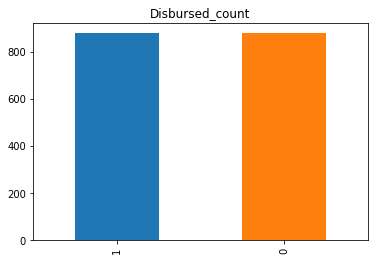

In [81]:
df_model_class_0_undsam=df_model_class_0.sample(count_class_1)
df_model_undsam = pd.concat([df_model_class_0_undsam,df_model_class_1],axis=0)
print(df_model_undsam['Disbursed'].value_counts())
df_model_undsam['Disbursed'].value_counts().plot(kind='bar', title='Disbursed_count')
plt.show()

In [82]:
X_train_undsam = df_model_undsam.drop(["Disbursed"], axis = 1)
y_train_undsam = df_model_undsam.Disbursed

Metoda oversamplingu

1    60035
0    60035
Name: Disbursed, dtype: int64


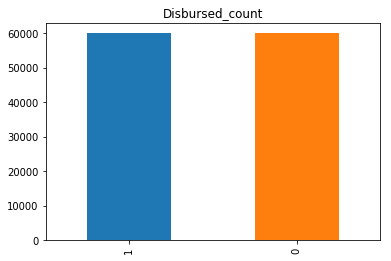

In [83]:
df_model_class_1_oversam=df_model_class_1.sample(count_class_0,replace=True) # ze zwracaniem, ponieważ nie mamy tyle danych
df_model_oversam = pd.concat([df_model_class_0,df_model_class_1_oversam],axis=0)
print(df_model_oversam['Disbursed'].value_counts())
df_model_oversam['Disbursed'].value_counts().plot(kind='bar', title='Disbursed_count')


In [84]:
X_train_oversam = df_model_oversam.drop(["Disbursed"], axis = 1)
y_train_oversam = df_model_oversam.Disbursed

Automatyzacja wyboru parametrow dla wybranych modeli

In [85]:
names = ["Regresja logistyczna", 
         "Drzewo decyzyjne", 
         "RandomForest",
         "Naiwny Bayes"
        ]

models = [
    [("scaler", MaxAbsScaler()), ("model", LogisticRegression())],
    [("model", DecisionTreeClassifier())],
    [("model", RandomForestClassifier(n_jobs=-1))],
    [("model", MultinomialNB())]
]

models_run = [
    True,
    True,
    True,
    True

]


parameters = [
    {"model__C": [0.01, 1, 10, 100], "model__penalty": ["l1","l2"]}, 
    {"model__criterion":["gini","entropy"]},
    {"model__n_estimators": [10, 100, 100], "model__max_depth": [10, 50, 100], "model__min_samples_split": [2,6,10]},
    {}
]

if len(names) != len(models) or len(models) != len(parameters) or len(models) != len(models_run):
    raise ValueError("Listy wejściowe nie są równej długości!", len(names), len(models), len(parameters) , len(models_run))

In [87]:
def model_search(X_train, y_train, X_test, y_test, names, models, parameters, models_run, scoring_p):
    best_names = []
    best_models = []
    best_params = []
    acc_test_tbl = []
    auc_test_tbl = []
    f1_test_tbl = []
    
#     if len(names) != len(models) or len(models) != len(parameters):
#         raise ValueError("Listy wejściowe nie są równej długości!", len(names), len(models), len(parameters))
    
    for name, model, parameter, model_run in zip(names, models, parameters, models_run):
        print("Fitting : ", name)
        pipe = Pipeline(model)
        gs = GridSearchCV(pipe, parameter, cv=5, scoring=scoring_p, n_jobs=-1)
        gs.fit(X_train, y_train)
    
        for mean, std, params in zip(gs.cv_results_["mean_test_score"], gs.cv_results_["std_test_score"], gs.cv_results_["params"]):
            print("mean: ", mean, ", std: ", std, params)
    
        best_names.append(name)
        best_models.append(gs.best_estimator_)
        best_params.append(gs.best_params_)        
    
    print()
    print("Wyniki :")
    for name, best_model, best_param, model_run in zip(best_names, best_models, best_params, models_run):
        acc_test_score = accuracy_score(y_test, best_model.predict(X_test))
        auc_test_score = roc_auc_score(y_test, best_model.predict(X_test))
        f1_test_score = f1_score(y_test, best_model.predict(X_test))
        print(name, " (", best_param, "):", acc_test_score, " :", auc_test_score, " :", f1_test_score)
        acc_test_tbl.append(acc_test_score)
        auc_test_tbl.append(auc_test_score)
        f1_test_tbl.append(f1_test_score)
    
    models_dict = {'Method': best_names,
         'Accuracy Score Test': acc_test_tbl,
         'AUC Score test': auc_test_tbl,
         'F1 Score test': f1_test_tbl           
    }
    models_df = pd.DataFrame(models_dict)
    display(models_df)

Modelowanie na oversampling

In [88]:
model_search(X_train_oversam, y_train_oversam, X_test, y_test, names, models, parameters, models_run, "roc_auc")

Fitting :  Regresja logistyczna


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.8169003008426646 , std:  0.00211489317992509 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.8177920053561937 , std:  0.0020950107357037315 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.8421681512801771 , std:  0.002240064359239467 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.827112615639267 , std:  0.002301402690972297 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.8430088202136938 , std:  0.002094827732876604 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.8315536592993639 , std:  0.0026907599094106753 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.8430834164926515 , std:  0.00211141504436271 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.8397424099149736 , std:  0.0023885480036387723 {'model__C': 100, 'model__penalty': 'l2'}
Fitting :  Drzewo decyzyjne
mean:  0.9908331866237574 , std:  0.0007066231074419665 {'model__criterion': 'gini'}
mean:  0.990715695958402 , std:  0.0004329291858190276 {'model__criterion': 'entropy'}
Fitting :  RandomForest


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/externa

mean:  0.9406481452766278 , std:  0.002125381356026536 {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 10}
mean:  0.9488667395367194 , std:  0.0017216306333202288 {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}
mean:  0.9492500893870042 , std:  0.0012683238455686277 {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}
mean:  0.939454295452108 , std:  0.0018529541614181796 {'model__max_depth': 10, 'model__min_samples_split': 6, 'model__n_estimators': 10}
mean:  0.949130024642284 , std:  0.0007536336679363151 {'model__max_depth': 10, 'model__min_samples_split': 6, 'model__n_estimators': 100}
mean:  0.9491922402307047 , std:  0.0009070674753970525 {'model__max_depth': 10, 'model__min_samples_split': 6, 'model__n_estimators': 100}
mean:  0.937818755527447 , std:  0.004367821512878983 {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 10}
mean:  0.9500649911687437 ,

,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.756416,0.748884,0.084113
1,Drzewo decyzyjne,0.971846,0.524609,0.063694
2,RandomForest,0.984027,0.503302,0.014184
3,Naiwny Bayes,0.588524,0.567433,0.038489


Modelowanie na undersampling

In [90]:
model_search(X_train_undsam, y_train_undsam, X_test, y_test, names, models, parameters, models_run, "roc_auc")

Fitting :  Regresja logistyczna


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.754538787435545 , std:  0.02038812624124885 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.7686173780713029 , std:  0.02320773978640771 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.8281519362321411 , std:  0.011844074422854962 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.8205344768996645 , std:  0.017736523816653575 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.8287059158134243 , std:  0.013903514788599167 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.8278531536722663 , std:  0.015492490081064094 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.8272733551999764 , std:  0.013533721704486737 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.8276243295953194 , std:  0.013819467905983214 {'model__C': 100, 'model__penalty': 'l2'}
Fitting :  Drzewo decyzyjne
mean:  0.6945392491467577 , std:  0.007704226353989875 {'model__criterion': 'gini'}
mean:  0.6962457337883959 , std:  0.013076201355171747 {'model__criterion': 'entropy'}
Fitting :  RandomForest
mean:  0

,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.741745,0.748933,0.081221
1,Drzewo decyzyjne,0.691297,0.712076,0.066921
2,RandomForest,0.709492,0.760051,0.077821
3,Naiwny Bayes,0.627595,0.569774,0.039708
